# Coördinated Spiking Model (single neuron)

Install required packages:

In [2]:
import numpy as np
import pylab as pl

Initiate parameters:

In [150]:
# timesteps
dt = 0.01
iterations = 800
xtime = np.arange(0, iterations) * dt

# read-out over time
xhat = np.ones(iterations) * 0

# signal over time
x = 5
x_t = np.ones(iterations) * x

step = 150
x_t[0:step] = 0
x_t[iterations - 2 * step:iterations] = 3

# derivative of signal over time
dxdt = np.diff(x_t)/dt

# neural input over time
c = x_t[:-1] + dxdt

# voltage/error over time
V = np.zeros(iterations)
dVdt = np.zeros(iterations)
voltages = np.zeros(iterations)

# spikes over time
spike = np.zeros(iterations)
o = np.zeros(iterations)

# read-out weight
gamma = 2

# threshold
T = gamma**2 / 2

Run simulation:

In [151]:
for t in range(1, iterations):
    
    # update read-out
    dxhatdt = -xhat[t - 1] + gamma * o[t - 1]
    xhat[t] = xhat[t - 1] + dt * dxhatdt
    
    # compute error
    dVdt = -voltages[t - 1] + gamma * c[t - 1] - o[t - 1] * (gamma ** 2)
    voltages[t] =  voltages[t - 1] + dt * dVdt

    # reset neuron when threshold is exceeded
    if voltages[t] > T:
        
        # update spikes
        o[t] = 1/dt
        spike[t] = 1

Plot results:

([], <a list of 0 Text xticklabel objects>)

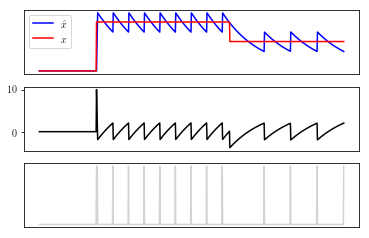

In [152]:
start = 0
end = iterations
plots = 3

# enable LaTeX
pl.rc('text', usetex=True)

# plot input and read-out
pl.subplot(plots, 1, 1)
pl.plot(xhat[start:end], color='blue', label=r'$\hat{x}$')
pl.plot(x_t[start:end], color='red', label=r'$x$')
pl.yticks([])
pl.xticks([])
pl.legend()

# plot voltage
pl.subplot(plots, 1, 2)
pl.plot(voltages[start:end], color='black')
#pl.ylabel(r'$V$')
# pl.yticks([])
pl.xticks([])

# plot spikes
pl.subplot(plots, 1, 3)
pl.plot(spike[start:end], color='lightgrey')
# pl.xlabel('time')
pl.yticks([])
pl.xticks([])